In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
import import_ipynb
import warnings
warnings.filterwarnings('ignore')
import Lib.Functions as fc

importing Jupyter notebook from /Users/admin/Desktop/Adaptive Engine/Lib/Functions.ipynb


In [5]:
df = pd.read_csv('Marketing-Customer-Value-Analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [14]:
remove_cols = ['Customer', 'Effective To Date']
use_cols = [col for col in df.columns if col not in remove_cols]

df = df[use_cols]
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [15]:
cont = fc.numbers_variable(df)
fc.display_numbers(df, cont)

1. Name var: Customer Lifetime Value, Numbers of unique: 8041, Unique Value: [ 2763.519279  6979.535903 12887.43165   7645.861827  2813.692575
  8256.2978    5380.898636  7216.100311 24127.50402   7388.178085]

2. Name var: Income, Numbers of unique: 5694, Unique Value: [56274     0 48767 43836 62902 55350 14072 28812 77026 99845]

3. Name var: Monthly Premium Auto, Numbers of unique: 202, Unique Value: [ 69  94 108 106  73  67 101  71  93 110]

4. Name var: Months Since Last Claim, Numbers of unique: 36, Unique Value: [32 13 18 12 14  0 17 23 27  9]

5. Name var: Months Since Policy Inception, Numbers of unique: 100, Unique Value: [ 5 42 38 65 44 94 13 68  3  7]

6. Name var: Number of Open Complaints, Numbers of unique: 6, Unique Value: [0 2 1 3 5 4]

7. Name var: Number of Policies, Numbers of unique: 9, Unique Value: [1 8 2 7 9 4 3 6 5]

8. Name var: Total Claim Amount, Numbers of unique: 5106, Unique Value: [ 384.811147 1131.464935  566.472247  529.881344  138.130879  159.383042
 

In [16]:
cat = fc.objects_variable(df)
fc.display_objects(df, cat)

1. Name obj: State, Number of unique: 5, Unique Values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']

2. Name obj: Response, Number of unique: 2, Unique Values: ['No' 'Yes']

3. Name obj: Coverage, Number of unique: 3, Unique Values: ['Basic' 'Extended' 'Premium']

4. Name obj: Education, Number of unique: 5, Unique Values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

5. Name obj: EmploymentStatus, Number of unique: 5, Unique Values: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']

6. Name obj: Gender, Number of unique: 2, Unique Values: ['F' 'M']

7. Name obj: Location Code, Number of unique: 3, Unique Values: ['Suburban' 'Rural' 'Urban']

8. Name obj: Marital Status, Number of unique: 3, Unique Values: ['Married' 'Single' 'Divorced']

9. Name obj: Policy Type, Number of unique: 3, Unique Values: ['Corporate Auto' 'Personal Auto' 'Special Auto']

10. Name obj: Policy, Number of unique: 9, Unique Values: ['Corporate L3' 'Personal L3' 'Corpo

----- State -----
Describe: 
count           9134
unique             5
top       California
freq            3150
Name: State, dtype: object
* Unique value: 
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
* Mode value: California
* Number of missing value: 0


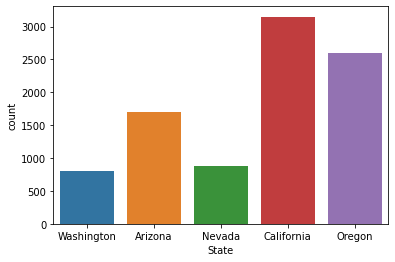

----- Response -----
Describe: 
count    9134.000000
mean        0.143201
std         0.350297
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64
* Unique value: 
0    7826
1    1308
Name: Response, dtype: int64
* Mode value: 0
* Number of missing value: 0


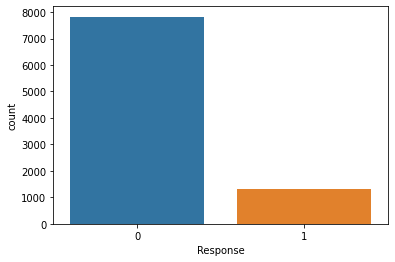

----- Coverage -----
Describe: 
count      9134
unique        3
top       Basic
freq       5568
Name: Coverage, dtype: object
* Unique value: 
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
* Mode value: Basic
* Number of missing value: 0


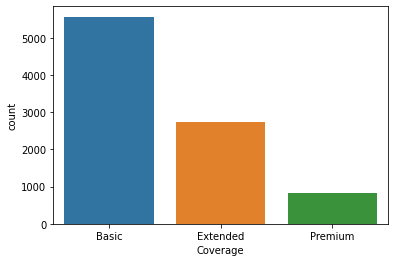

----- Education -----
Describe: 
count         9134
unique           5
top       Bachelor
freq          2748
Name: Education, dtype: object
* Unique value: 
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
* Mode value: Bachelor
* Number of missing value: 0


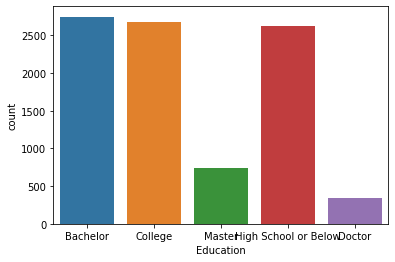

----- EmploymentStatus -----
Describe: 
count         9134
unique           5
top       Employed
freq          5698
Name: EmploymentStatus, dtype: object
* Unique value: 
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
* Mode value: Employed
* Number of missing value: 0


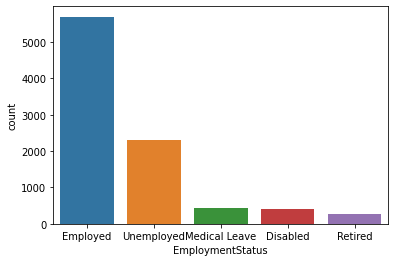

----- Gender -----
Describe: 
count     9134
unique       2
top          F
freq      4658
Name: Gender, dtype: object
* Unique value: 
F    4658
M    4476
Name: Gender, dtype: int64
* Mode value: F
* Number of missing value: 0


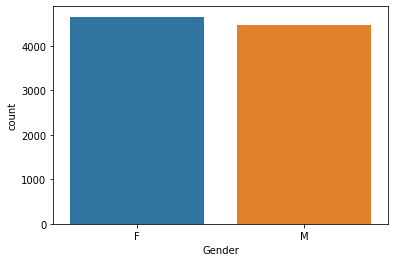

----- Location Code -----
Describe: 
count         9134
unique           3
top       Suburban
freq          5779
Name: Location Code, dtype: object
* Unique value: 
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
* Mode value: Suburban
* Number of missing value: 0


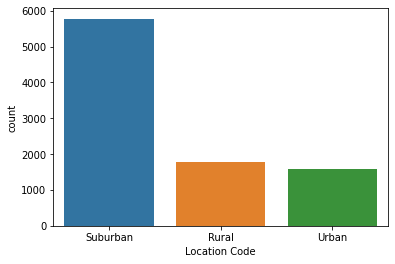

----- Marital Status -----
Describe: 
count        9134
unique          3
top       Married
freq         5298
Name: Marital Status, dtype: object
* Unique value: 
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
* Mode value: Married
* Number of missing value: 0


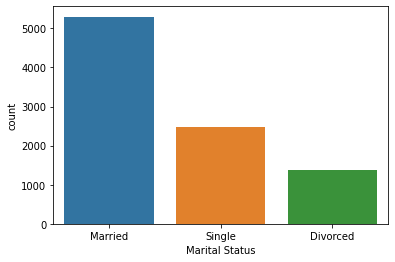

----- Policy Type -----
Describe: 
count              9134
unique                3
top       Personal Auto
freq               6788
Name: Policy Type, dtype: object
* Unique value: 
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64
* Mode value: Personal Auto
* Number of missing value: 0


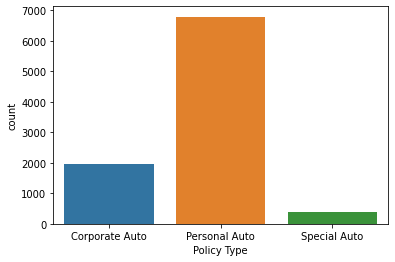

----- Policy -----
Describe: 
count            9134
unique              9
top       Personal L3
freq             3426
Name: Policy, dtype: object
* Unique value: 
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64
* Mode value: Personal L3
* Number of missing value: 0


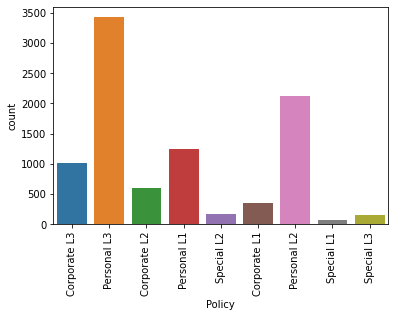

----- Renew Offer Type -----
Describe: 
count       9134
unique         4
top       Offer1
freq        3752
Name: Renew Offer Type, dtype: object
* Unique value: 
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64
* Mode value: Offer1
* Number of missing value: 0


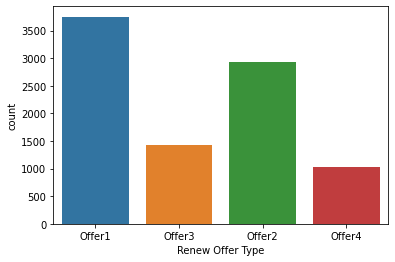

----- Sales Channel -----
Describe: 
count      9134
unique        4
top       Agent
freq       3477
Name: Sales Channel, dtype: object
* Unique value: 
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64
* Mode value: Agent
* Number of missing value: 0


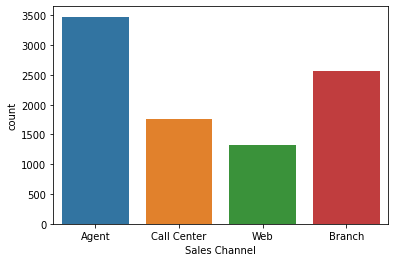

----- Vehicle Class -----
Describe: 
count              9134
unique                6
top       Four-Door Car
freq               4621
Name: Vehicle Class, dtype: object
* Unique value: 
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64
* Mode value: Four-Door Car
* Number of missing value: 0


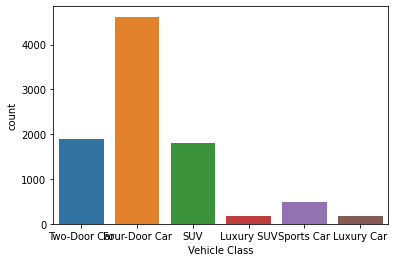

----- Vehicle Size -----
Describe: 
count        9134
unique          3
top       Medsize
freq         6424
Name: Vehicle Size, dtype: object
* Unique value: 
Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64
* Mode value: Medsize
* Number of missing value: 0


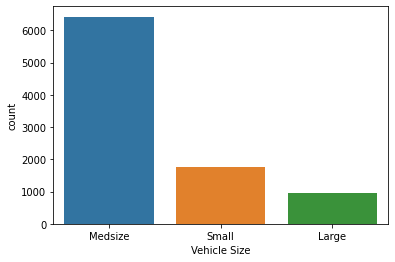

In [25]:
for col in cat:
    fc.categorical_analysis(df, col)

In [18]:
df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Response'] = encoder.fit_transform(df['Response'])

In [20]:
df['Response'].value_counts()

0    7826
1    1308
Name: Response, dtype: int64

In [23]:
label = 'Response'

inputs = df.drop(label, axis = 1)
y = df[label]

In [24]:
X = pd.get_dummies(inputs)

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [34]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()

gauss_model = gauss.fit(X_train, y_train)

In [35]:
gauss_model.score(X_train, y_train)

0.856439031066101

In [36]:
cross_val_score(gauss_model, X_test, y_test)

array([0.85519126, 0.85519126, 0.85753425, 0.85753425, 0.85753425])

In [37]:
fc.eval_clf_testset(gauss_model, X_test, y_test)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.8555

* Confusion Matrix of Test: 
[[1563    2]
 [ 262    0]]

* Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1565
           1       0.00      0.00      0.00       262

    accuracy                           0.86      1827
   macro avg       0.43      0.50      0.46      1827
weighted avg       0.73      0.86      0.79      1827



In [38]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state = 42)

logit_clf = logit.fit(X_train, y_train)

In [39]:
fc.eval_clf_testset(logit_clf, X_test, y_test)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.8566

* Confusion Matrix of Test: 
[[1565    0]
 [ 262    0]]

* Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1565
           1       0.00      0.00      0.00       262

    accuracy                           0.86      1827
   macro avg       0.43      0.50      0.46      1827
weighted avg       0.73      0.86      0.79      1827



In [40]:
from sklearn.svm import SVC, LinearSVC

svc = SVC(random_state = 42)

svc_clf = svc.fit(X_train, y_train)

In [41]:
fc.eval_clf_testset(svc_clf, X_test, y_test)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.8566

* Confusion Matrix of Test: 
[[1565    0]
 [ 262    0]]

* Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1565
           1       0.00      0.00      0.00       262

    accuracy                           0.86      1827
   macro avg       0.43      0.50      0.46      1827
weighted avg       0.73      0.86      0.79      1827



In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 42)

tree_clf = tree.fit(X_train, y_train)

In [44]:
tree_clf.score(X_train, y_train)

1.0

In [45]:
cross_val_score(tree_clf, X_train, y_train)

array([0.95622435, 0.95280438, 0.95071869, 0.95003422, 0.954141  ])

In [43]:
fc.eval_clf_testset(tree_clf, X_test, y_test)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.9639

* Confusion Matrix of Test: 
[[1505   60]
 [   6  256]]

* Classification Report of Test: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1565
           1       0.81      0.98      0.89       262

    accuracy                           0.96      1827
   macro avg       0.90      0.97      0.93      1827
weighted avg       0.97      0.96      0.97      1827



* Area below the curve: 0.96938



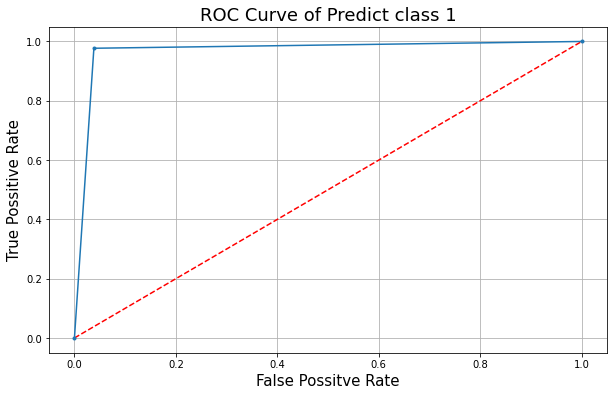

In [49]:
fc.ROC_curve_display(tree_clf, X_test, y_test, 1)

In [50]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 42)

forest_clf = forest.fit(X_train, y_train)

In [51]:
forest_clf.score(X_train, y_train)

1.0

In [52]:
cross_val_score(forest_clf, X_train, y_train)

array([0.98974008, 0.99042408, 0.9945243 , 0.99247091, 0.98425736])

In [53]:
fc.eval_clf_testset(forest_clf, X_test, y_test)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.9967

* Confusion Matrix of Test: 
[[1563    2]
 [   4  258]]

* Classification Report of Test: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1565
           1       0.99      0.98      0.99       262

    accuracy                           1.00      1827
   macro avg       0.99      0.99      0.99      1827
weighted avg       1.00      1.00      1.00      1827



* Area below the curve: 0.99983



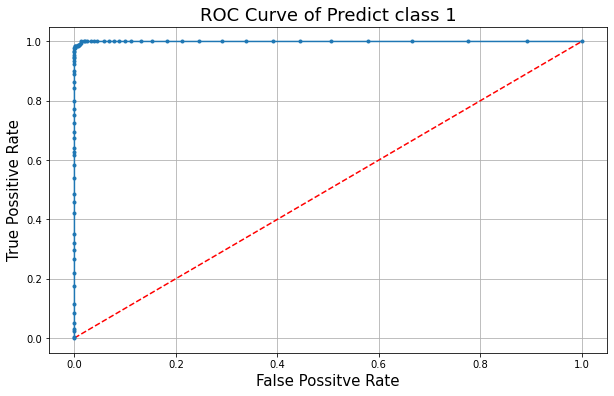

In [55]:
fc.ROC_curve_display(forest_clf, X_test, y_test, 1)

In [56]:
import xgboost as xgb

xgb = xgb.XGBClassifier(random_state = 42)

xgb_clf = xgb.fit(X_train, y_train)

In [57]:
xgb_clf.score(X_train, y_train)

1.0

In [58]:
cross_val_score(xgb_clf, X_train, y_train)

array([0.99042408, 0.99316005, 0.99383984, 0.98699521, 0.9890486 ])

In [59]:
fc.eval_clf_testset(xgb_clf, X_test, y_test)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.994

* Confusion Matrix of Test: 
[[1554   11]
 [   0  262]]

* Classification Report of Test: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1565
           1       0.96      1.00      0.98       262

    accuracy                           0.99      1827
   macro avg       0.98      1.00      0.99      1827
weighted avg       0.99      0.99      0.99      1827



* Area below the curve: 0.9997



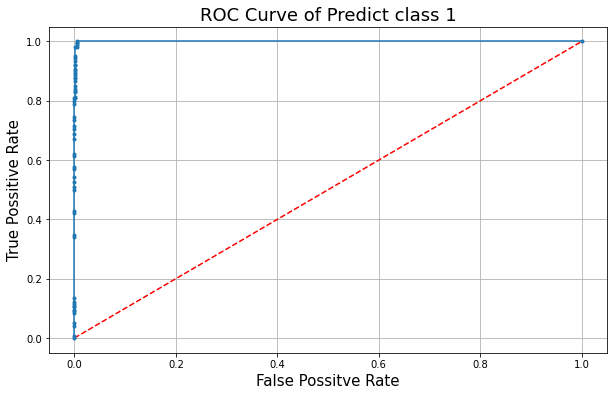

In [60]:
fc.ROC_curve_display(xgb_clf, X_test, y_test, 1)

In [67]:
prob = xgb_clf.predict_proba(X_test)

In [72]:
for p in prob[:, 1]:
    if p < 0.9 and p > 0.5:
        print(p)

0.8672795
0.8796882
0.5777419
0.85554373
0.8976556
0.83352566
0.5371251
0.892128
0.8939574
0.8450684
0.56764257
0.8935058
0.86682296
0.5064719
0.80409765
0.80295193
0.799434
0.87824774
0.8567663
0.7961795
0.8976556
0.80409765
0.77472985
0.8613539
0.86570567
0.8905845
0.81269413
0.8381464
0.8734435
0.80895364
0.5527468
0.88274884
0.8686454
0.89474094
0.80409765
0.895604
0.5842706
0.85094154
0.887126
0.8965178
0.7156287
0.8634664
0.8891978
0.5179965
0.60972905
0.89908963
0.70305955
0.81877095
0.87235177
0.786767
0.6902836
0.89691937
0.8567663
0.79078233
0.89621794
0.504608
0.56169677
0.549469
0.8951601
0.8672795
0.8891978
0.8734435
0.5527468
0.8967892
0.6552823
0.8223197
0.8365274
0.8613539
0.79410076
0.7961795
0.8223197
0.83352566
0.8295952
0.8510538
0.87975615
0.87235177
0.89924335
0.80654025
0.892911
0.80409765
0.67977315
0.82526326


In [78]:
xgb_imp = pd.DataFrame({'Colums': X_train.columns,
                        'Score': xgb_clf.feature_importances_}).sort_values(by = 'Score', ascending = False)
xgb_imp.head(10)

,Colums,Score
24,EmploymentStatus_Retired,0.084645
47,Renew Offer Type_Offer2,0.084595
49,Renew Offer Type_Offer4,0.068230
48,Renew Offer Type_Offer3,0.063103
46,Renew Offer Type_Offer1,0.048569
29,Location Code_Suburban,0.042122
33,Marital Status_Single,0.030162
31,Marital Status_Divorced,0.024584
20,Education_Master,0.024330
23,EmploymentStatus_Medical Leave,0.022154


In [79]:
forest_imp = pd.DataFrame({'Colums': X_train.columns,
                           'Score': forest_clf.feature_importances_}).sort_values(by = 'Score', ascending = False)
forest_imp.head(10)

,Colums,Score
0,Customer Lifetime Value,0.083680
1,Income,0.077284
7,Total Claim Amount,0.076214
4,Months Since Policy Inception,0.072257
2,Monthly Premium Auto,0.070541
3,Months Since Last Claim,0.066616
24,EmploymentStatus_Retired,0.057498
6,Number of Policies,0.038873
47,Renew Offer Type_Offer2,0.028520
5,Number of Open Complaints,0.018874


In [101]:
from sklearn.inspection import permutation_importance

per_imp = permutation_importance(forest_clf, X_train, y_train)

In [114]:
per_imp.importances.reshape(-1)

array([0.00478993, 0.00520049, 0.00506364, 0.00478993, 0.00424251,
       0.01970713, 0.01779116, 0.01792801, 0.01628575, 0.01792801,
       0.00205283, 0.00191597, 0.00136855, 0.00205283, 0.00260025,
       0.0039688 , 0.00478993, 0.0039688 , 0.00260025, 0.00410565,
       0.00615848, 0.0067059 , 0.00711646, 0.00875872, 0.00656904,
       0.00068428, 0.00068428, 0.00068428, 0.00041057, 0.00054742,
       0.00301081, 0.0027371 , 0.00287396, 0.00260025, 0.00301081,
       0.00930614, 0.01026413, 0.00848501, 0.01081155, 0.0106747 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [118]:
sorted_idx = per_imp.importances_mean.argsort()

In [119]:
demo = pd.DataFrame({'Columns': X_train.columns[sorted_idx], 
                     'Score': per_imp.importances_mean[sorted_idx]}).sort_values(by = 'Score', ascending = False)
demo

,Columns,Score
62,Renew Offer Type_Offer2,0.051129
61,EmploymentStatus_Retired,0.021842
60,Income,0.017928
59,Sales Channel_Agent,0.010182
58,Total Claim Amount,0.009908
...,...,...
26,Vehicle Class_SUV,0.000000
27,State_Arizona,0.000000
28,State_California,0.000000
29,State_Nevada,0.000000


In [128]:
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif, SelectFromModel
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

In [121]:
selector = SelectKBest(f_classif, k = 40)
X_new = selector.fit_transform(X_train, y_train)

In [125]:
feature_idx = selector.get_support()
for name, included in zip(X_train.columns, feature_idx):
    print('{}: {}'.format(name, included))

Customer Lifetime Value: False
Income: False
Monthly Premium Auto: True
Months Since Last Claim: True
Months Since Policy Inception: False
Number of Open Complaints: False
Number of Policies: True
Total Claim Amount: True
State_Arizona: False
State_California: True
State_Nevada: False
State_Oregon: True
State_Washington: False
Coverage_Basic: False
Coverage_Extended: False
Coverage_Premium: False
Education_Bachelor: False
Education_College: False
Education_Doctor: True
Education_High School or Below: True
Education_Master: True
EmploymentStatus_Disabled: True
EmploymentStatus_Employed: True
EmploymentStatus_Medical Leave: True
EmploymentStatus_Retired: True
EmploymentStatus_Unemployed: True
Gender_F: False
Gender_M: True
Location Code_Rural: True
Location Code_Suburban: True
Location Code_Urban: True
Marital Status_Divorced: True
Marital Status_Married: True
Marital Status_Single: True
Policy Type_Corporate Auto: False
Policy Type_Personal Auto: False
Policy Type_Special Auto: False
Po

In [126]:
feature_names = X_train.columns[feature_idx]
feature_names

Index(['Monthly Premium Auto', 'Months Since Last Claim', 'Number of Policies',
       'Total Claim Amount', 'State_California', 'State_Oregon',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_M',
       'Location Code_Rural', 'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Policy_Personal L3', 'Policy_Special L2',
       'Policy_Special L3', 'Renew Offer Type_Offer1',
       'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3',
       'Renew Offer Type_Offer4', 'Sales Channel_Agent',
       'Sales Channel_Branch', 'Sales Channel_Call Center',
       'Sales Channel_Web', 'Vehicle Class_Four-Door Car',
       'Vehicle Class_Luxury Car', 'Vehicle Class_Luxury SUV',
       'Vehicle Class

In [134]:
def fit_model(X, Y):
    '''Use a RandomForestClassifier for this problem.'''
    
    # define the model to use
    model = RandomForestClassifier(random_state=42)
    
    # Train the model
    model.fit(X, Y)
    
    return model

In [135]:
def calculate_metrics(model, X_test, Y_test):
    '''Get model evaluation metrics on the test set.'''
    
    # Get model predictions
    y_predict_r = model.predict(X_test)
    
    # Calculate evaluation metrics for assesing performance of the model.
    roc=roc_auc_score(Y_test, y_predict_r)
    acc = accuracy_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)
    
    return acc, roc, prec, rec, f1

In [136]:
def train_and_get_metrics(X, Y):
    '''Train a Random Forest Classifier and get evaluation metrics'''
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 42)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
#     scaler = StandardScaler().fit(X_train)
#     X_train_scaled = scaler.transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train, Y_train)

    # Make predictions on test dataset and calculate metrics.
    roc, acc, prec, rec, f1 = calculate_metrics(model, X_test, Y_test)

    return acc, roc, prec, rec, f1

In [137]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''
    
    # Train the model, predict values and get metrics
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score", 'Feature Count'])
    
    return display_df

In [138]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.991727,0.996716,0.992308,0.984733,0.988506,63


In [147]:
def univariate_selection(k):
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
#     scaler = StandardScaler().fit(X_train)
#     X_train_scaled = scaler.transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
    # User SelectKBest to select top 20 features based on f-test
    selector = SelectKBest(f_classif, k=k)
    
    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train, Y_train)
    
    # Print the results
    feature_idx = selector.get_support()
#     for name, included in zip(X_train.columns, feature_idx):
#         print("%s: %s" % (name, included))
    
    # Drop the target variable
    feature_names = X_train.columns[feature_idx]
    
    return feature_names

In [151]:
univariate_feature_names = univariate_selection(50)

In [152]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(X_train[univariate_feature_names], y_train)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = results.append(univariate_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.991727,0.996716,0.992308,0.984733,0.988506,63
F-test,0.967301,0.984952,0.951691,0.942584,0.947115,40
F-test,0.967301,0.984952,0.951691,0.942584,0.947115,40
F-test,0.968499,0.987004,0.965686,0.942584,0.953995,50


In [198]:
def run_rfe():
    
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 42)
    
    # All features of dataset are float values. You normalize all features of the train and test dataset here.
#     scaler = StandardScaler().fit(X_train)
#     X_train_scaled = scaler.transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

    # Define the model
    model1 = RandomForestClassifier(random_state=42)
    
    # Wrap RFE around the model
    rfe = RFE(model1, n_features_to_select=5)
    
    # Fit RFE
    rfe = rfe.fit(X_train, Y_train)
    feature_name = X_train.columns[rfe.get_support()]
    
    return feature_name

In [199]:
rfe_feature_names = run_rfe()

In [200]:
# Calculate and check model metrics
rfe_eval_df = evaluate_model_on_features(X_train[rfe_feature_names], y_train)
rfe_eval_df.index = ['RFE']

# Append to results and display
results = results.append(rfe_eval_df)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.991727,0.996716,0.992308,0.984733,0.988506,63
F-test,0.967301,0.984952,0.951691,0.942584,0.947115,40
F-test,0.967301,0.984952,0.951691,0.942584,0.947115,40
F-test,0.968499,0.987004,0.965686,0.942584,0.953995,50
RFE,0.988036,0.993160,0.971564,0.980861,0.976190,31
RFE,0.987637,0.992476,0.966981,0.980861,0.973872,40
RFE,0.988036,0.993160,0.971564,0.980861,0.976190,20
RFE,0.988435,0.993844,0.976190,0.980861,0.978520,15
RFE,0.988036,0.993160,0.971564,0.980861,0.976190,10
RFE,0.988834,0.994528,0.980861,0.980861,0.980861,5


In [201]:
X_train[rfe_feature_names]

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Total Claim Amount
3097,5979.724161,57693,76,56,547.200000
7581,2885.328202,62579,72,53,326.242099
5075,7440.923530,34137,62,9,297.600000
6347,5414.320958,0,74,51,78.581528
2381,3731.504584,0,96,34,460.800000
...,...,...,...,...,...
8077,5252.511788,0,74,62,532.800000
6848,2248.449633,24910,63,63,347.857619
2618,8901.468512,76558,74,45,216.980413
7514,8291.659086,85132,106,60,501.134524


Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Policy Inception', 'Total Claim Amount'],
      dtype='object')

In [203]:
model2 = RandomForestClassifier(random_state = 42)
model2_clf = model2.fit(X_train[rfe_feature_names], y_train)

In [205]:
model2_clf.score(X_train[rfe_feature_names], y_train)

1.0

In [206]:
cross_val_score(model2_clf, X_train[rfe_feature_names], y_train)

array([0.99521204, 0.99794802, 0.99657769, 0.99589322, 0.99383984])

In [207]:
fc.eval_clf_testset(model2_clf, X_test[rfe_feature_names], y_test)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.9973

* Confusion Matrix of Test: 
[[1560    5]
 [   0  262]]

* Classification Report of Test: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1565
           1       0.98      1.00      0.99       262

    accuracy                           1.00      1827
   macro avg       0.99      1.00      0.99      1827
weighted avg       1.00      1.00      1.00      1827



In [230]:
import shap
shap.initjs()

ex = shap.KernelExplainer(model2.predict_proba, X_test[rfe_feature_names])
shap_values = ex.shap_values(X_test[rfe_feature_names])

Using 1827 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1827 [00:00<?, ?it/s]

In [244]:
shap.force_plot(ex.expected_value[0], shap_values[0], X_test[rfe_feature_names])

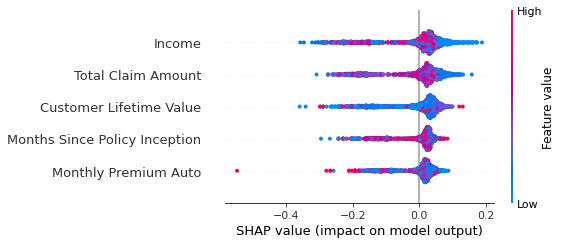

In [246]:
shap.summary_plot(shap_values[0], X_test[rfe_feature_names])

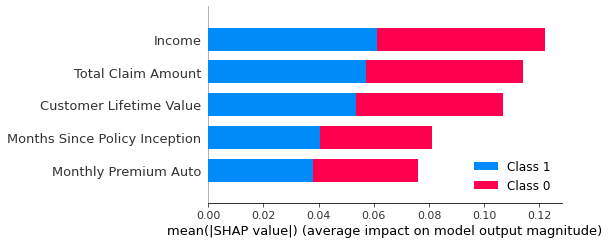

In [249]:
shap.summary_plot(shap_values, X_test[rfe_feature_names])

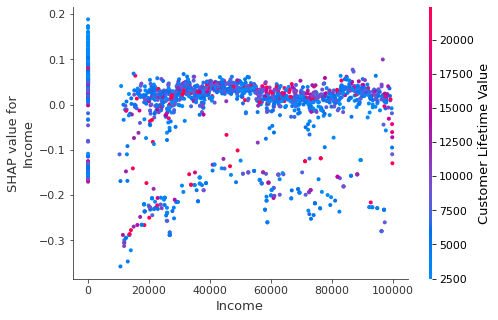

In [247]:
shap.dependence_plot('Income', shap_values[0], X_test[rfe_feature_names])

In [388]:
# ex1 = shap.KernelExplainer(model2.predict_proba, X_test[rfe_feature_names].iloc[0, :])
shap_values1 = ex.shap_values(X_test[rfe_feature_names].iloc[100, :])
shap.force_plot(ex.expected_value[0], shap_values1[0], X_test[rfe_feature_names].iloc[100, :])

In [354]:
y_test[y_test == 1]

8133    1
8436    1
3443    1
7540    1
7405    1
       ..
3873    1
8946    1
4426    1
4461    1
2359    1
Name: Response, Length: 262, dtype: int64

In [361]:
pred = model2.predict_proba(X_test[rfe_feature_names].iloc[146, :].values.reshape(1, -1))
pred

array([[0.03, 0.97]])

In [364]:
X_test[rfe_feature_names].iloc[146, :].values.reshape(1, -1)

array([[1.37277997e+04, 0.00000000e+00, 1.26000000e+02, 4.00000000e+00,
        6.04800000e+02]])

In [270]:
ex.shap_values(X_test[rfe_feature_names].iloc[100, :])

[array([ 0.00904224,  0.03139719, -0.01900556,  0.04447829, -0.01115025]),
 array([-0.00904224, -0.03139719,  0.01900556, -0.04447829,  0.01115025])]

In [239]:
shap_values1[0]

array([ 0.00904224,  0.03139719, -0.01900556,  0.04447829, -0.01115025])

In [240]:
shap_values1[1]

array([-0.00904224, -0.03139719,  0.01900556, -0.04447829,  0.01115025])

In [416]:
ex2 = shap.TreeExplainer(model2)
shap_values2 = ex2.shap_values(X_test[rfe_feature_names])

In [422]:
shap_values2[0][100]

array([-0.00954854,  0.02997102, -0.02914198,  0.04652725, -0.02466008])

In [419]:
shap.force_plot(ex2.expected_value[0], shap_values2[0], X_test[rfe_feature_names].iloc[100, :])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [390]:
shap_values3 = ex2.shap_values(X_test[rfe_feature_names])

In [397]:
shap_values3

[array([[ 0.01447373,  0.08685938,  0.01444203,  0.01676276,  0.01060977],
        [ 0.04034456,  0.01361541,  0.00234128,  0.03736593, -0.02051953],
        [ 0.01708746,  0.00934987, -0.00725375,  0.00875333,  0.02521076],
        ...,
        [ 0.03008508,  0.05270185,  0.01241555,  0.01164362,  0.02630156],
        [ 0.06230679, -0.01539445,  0.03013256,  0.00850793,  0.01759485],
        [-0.07115913,  0.13933184,  0.03632446,  0.01281906,  0.01583143]]),
 array([[-0.01447373, -0.08685938, -0.01444203, -0.01676276, -0.01060977],
        [-0.04034456, -0.01361541, -0.00234128, -0.03736593,  0.02051953],
        [-0.01708746, -0.00934987,  0.00725375, -0.00875333, -0.02521076],
        ...,
        [-0.03008508, -0.05270185, -0.01241555, -0.01164362, -0.02630156],
        [-0.06230679,  0.01539445, -0.03013256, -0.00850793, -0.01759485],
        [ 0.07115913, -0.13933184, -0.03632446, -0.01281906, -0.01583143]])]

In [399]:
df_shap3 = pd.DataFrame(shap_values3[0])
df_shap3.columns = X_test[rfe_feature_names].columns
df_shap3

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Total Claim Amount
0,0.014474,0.086859,0.014442,0.016763,0.010610
1,0.040345,0.013615,0.002341,0.037366,-0.020520
2,0.017087,0.009350,-0.007254,0.008753,0.025211
3,0.027929,0.058863,0.018659,0.021930,-0.004233
4,0.069999,0.018374,0.014979,0.019680,0.020116
...,...,...,...,...,...
1822,0.021203,0.023570,0.042593,0.010068,0.045714
1823,-0.156353,-0.201698,-0.090620,-0.132256,-0.185924
1824,0.030085,0.052702,0.012416,0.011644,0.026302
1825,0.062307,-0.015394,0.030133,0.008508,0.017595


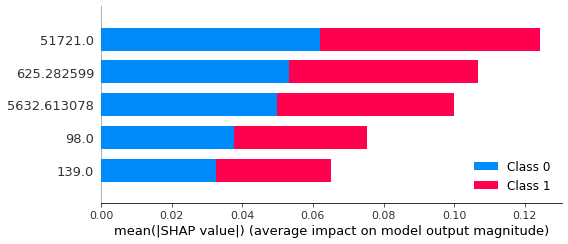

In [403]:
shap_values2 = ex2.shap_values(X_test[rfe_feature_names])
shap.summary_plot(shap_values2, X_test[rfe_feature_names].iloc[100, :])

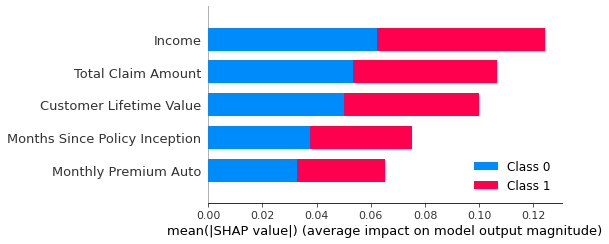

In [404]:
shap.summary_plot(shap_values2, X_test[rfe_feature_names])

In [412]:
# base_values
ex.expected_value

array([0.8152381, 0.1847619])

In [212]:
tf_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, input_dim = 63, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

tf_model.compile(loss = 'binary_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])

tf_model.fit(X_train, y_train,
             validation_data = (X_test, y_test),
             epochs = 100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
223/229 [============================>.] - ETA: 0s - loss: 15.7069 - accuracy: 0.8505WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f9100c9e9d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set 

Epoch 44/100
229/229 [==============================] - 1s 2ms/step - loss: 0.4107 - accuracy: 0.8568 - val_loss: 0.4111 - val_accuracy: 0.8566
Epoch 45/100
229/229 [==============================] - 1s 3ms/step - loss: 0.4107 - accuracy: 0.8568 - val_loss: 0.4111 - val_accuracy: 0.8566
Epoch 46/100
229/229 [==============================] - 1s 2ms/step - loss: 0.4107 - accuracy: 0.8568 - val_loss: 0.4111 - val_accuracy: 0.8566
Epoch 47/100
229/229 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8568 - val_loss: 0.4111 - val_accuracy: 0.8566
Epoch 48/100
229/229 [==============================] - 1s 2ms/step - loss: 0.4107 - accuracy: 0.8568 - val_loss: 0.4111 - val_accuracy: 0.8566
Epoch 49/100
229/229 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8568 - val_loss: 0.4111 - val_accuracy: 0.8566
Epoch 50/100
229/229 [==============================] - 1s 2ms/step - loss: 0.4107 - accuracy: 0.8568 - val_loss: 0.4111 - val_accuracy:

In [216]:
tf_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               32768     
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 16)                4112      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 168,225
Trainable params: 168,225
Non-trainable params: 0
_________________________________________________________________


In [215]:
base_eval_dict = tf_model.evaluate(X_test, y_test, return_dict = True)
base_eval_dict

58/58 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8566


{'loss': 0.4110957682132721, 'accuracy': 0.856595516204834}

In [218]:
def print_result(model, model_name, eval_dict):
    print('{}:'.format(model_name))
    print('Number of units in 1st Dense layer: {}'.format(model.get_layer('dense_8').units))
    print('Learning rate for the optimizer: {}'.format(model.optimizer.lr.numpy()))
    for key, value in eval_dict.items():
        print('{}: {}'.format(key, value))
        
print_result(tf_model, 'BASELINE MODEL', base_eval_dict)

BASELINE MODEL:
Number of units in 1st Dense layer: 512
Learning rate for the optimizer: 0.0010000000474974513
loss: 0.4110957682132721
accuracy: 0.856595516204834
